# Alerta-Rio PLUVIOMETRIC STATIONS - DATA CLEANING

### Import modules and functions

In [1]:
import os, sys, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from IPython.display import clear_output as co

#### Change project root folder

In [2]:
cd ../

C:\Users\luisr\Desktop\Repositories\Data Science Projects\Hackaton COR IV - Centro de Operações do RJ\ACELERAÇÃO


### Load data

In [3]:
data_path = '../../../Dados/Desafio COR-Rio IV/Meio Ambiente Clima/Meteorologia_AlertaRio.csv'

alerta_rio = pd.read_csv(data_path)

display(alerta_rio.tail(), alerta_rio.shape)

,primary_key,id_estacao,acumulado_chuva_15_min,acumulado_chuva_1_h,acumulado_chuva_4_h,acumulado_chuva_24_h,acumulado_chuva_96_h,horario,data_particao
7865588,33_2018-01-30 07:45:00,33,0.0,0.4,0.8,1.6,161.0,07:45:00,2018-01-30
7865589,33_2018-01-30 13:00:00,33,0.0,0.0,0.8,2.6,152.6,13:00:00,2018-01-30
7865590,33_2018-01-30 14:00:00,33,0.4,0.8,0.8,3.4,152.2,14:00:00,2018-01-30
7865591,33_2018-01-30 05:45:00,33,0.0,0.0,0.8,0.8,160.2,05:45:00,2018-01-30
7865592,33_2018-01-30 02:45:00,33,0.2,0.8,0.8,0.8,160.2,02:45:00,2018-01-30


(7865593, 9)

---
# 1. Exploratory Data Analysis

### 1. Data types

In [19]:
id_cols = ['primary_key', 'id_estacao', 'horario', 'data_particao']
float_cols = list(set(alerta_rio.columns).difference(id_cols))

### 2. Index and identity columns

#### Unique index values count

In [15]:
idx = ['Unique Index Values', 'Dataset Size']
vls = [alerta_rio['primary_key'].unique().shape[0], alerta_rio.shape[0]]

pd.DataFrame(vls, idx, ['Rows'])

,Rows
Unique Index Values,7865001
Dataset Size,7865593


Duplicate index keys found. The number of unique index values does not match the index size.

#### Unique identity columns' combinations count

In [23]:
alerta_rio.groupby(id_cols[1:4]).first().shape

(7864968, 6)

The count of combinations of the three identity columns should match the index size. The number of combinations found match the number of unique index values found.

### 3. Primary keys duplicates

#### Primary key column duplicates count

In [24]:
key_count = alerta_rio['primary_key'].value_counts()
dup_keys = key_count[key_count>1]

print('Missing hours in dataset:', dup_keys.shape[0]
if (dup_keys==2).all(): print('Every duplicate key can be found exactly twice.')

(592, True)

Every duplicate key can be found exactly twice.

#### Sample duplicates

In [34]:
alerta_rio.set_index('primary_key').loc[dup_keys.sample(3).index]

,id_estacao,acumulado_chuva_15_min,acumulado_chuva_1_h,acumulado_chuva_4_h,acumulado_chuva_24_h,acumulado_chuva_96_h,horario,data_particao
primary_key,,,,,,,,
19_2022-06-27 23:15:00,19,NaN,0.0,0.0,0.8,13.0,23:15:00,2022-06-27
19_2022-06-27 23:15:00,19,NaN,0.0,0.0,0.8,13.0,23:15:00,2022-06-27
26_2017-02-18 23:45:00,26,0.0,0.0,0.0,0.0,0.0,23:45:00,2017-02-18
26_2017-02-18 23:45:00,26,0.0,0.0,0.0,0.0,NaN,23:45:00,2017-02-18
19_2019-02-16 23:30:00,19,0.0,0.0,0.0,3.8,31.8,23:30:00,2019-02-16
19_2019-02-16 23:30:00,19,0.0,0.0,3.6,31.6,NaN,23:30:00,2019-02-16


Obs:
* Some stations have two records for the same date and time
* Rows with the same index key do not contain the same values but values are very close, as if they were sequential or very close in time. Hint: Average duplicates in data cleaning.

### 4. Date time description

In [27]:
dt = pd.to_datetime(alerta_rio['data_particao'] + ' ' + alerta_rio['horario'])

#### Start and end of time series

In [29]:
dt.min(), dt.max()

(Timestamp('2015-09-02 00:00:00'), Timestamp('2022-06-28 04:30:00'))

Obs: Twelve and a half years from 2010.

#### Unique date times

In [30]:
len(dt.unique())

238636

#### Date time range size

In [32]:
new_index = pd.date_range(dt.min(), dt.max(), freq='15Min')

len(new_index)

239155

#### All missing hours in dataset

In [35]:
missing_hours = list(set(new_index).difference(pd.DatetimeIndex(dt.unique())))
len(missing_hours), missing_hours[:10]

(520,
 [Timestamp('2022-06-26 21:45:00', freq='15T'),
  Timestamp('2022-06-23 07:15:00', freq='15T'),
  Timestamp('2022-06-14 08:30:00', freq='15T'),
  Timestamp('2022-06-26 14:30:00', freq='15T'),
  Timestamp('2022-06-28 03:00:00', freq='15T'),
  Timestamp('2022-06-22 22:45:00', freq='15T'),
  Timestamp('2022-06-24 21:45:00', freq='15T'),
  Timestamp('2022-06-27 22:30:00', freq='15T'),
  Timestamp('2022-06-22 12:15:00', freq='15T'),
  Timestamp('2022-06-24 14:30:00', freq='15T')])

#### Time range in days

In [36]:
time_range = dt.max() - dt.min(); time_range

Timedelta('2491 days 04:30:00')

#### Time range in hours

In [37]:
time_range.days * 24 + time_range.seconds / 60 / 60

59788.5

### 5. Missing Values

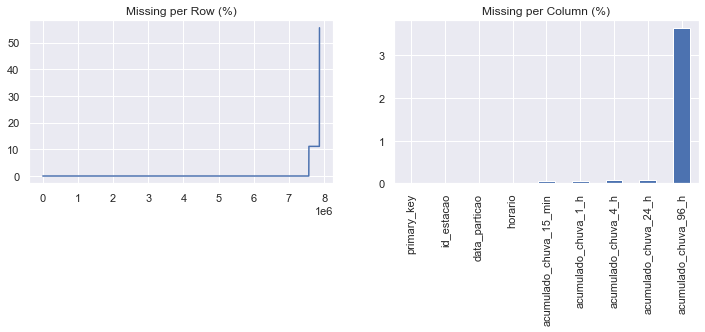

In [42]:
#### Missing per row
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
nan_prct = (100 * alerta_rio.isna().mean(1).sort_values()).rename('Missing Percantage')
nan_prct.reset_index(drop=True).plot(title='Missing per Row (%)', ax=ax[0])

#### Missing per column
nan_prct = (100 * alerta_rio.isna().sum().sort_values() / len(alerta_rio)).rename('Missing Percantage')
nan_prct.plot.bar(title='Missing per Column (%)', ax=ax[1]);

plt.show()

---
# Alerta Rio Time Series

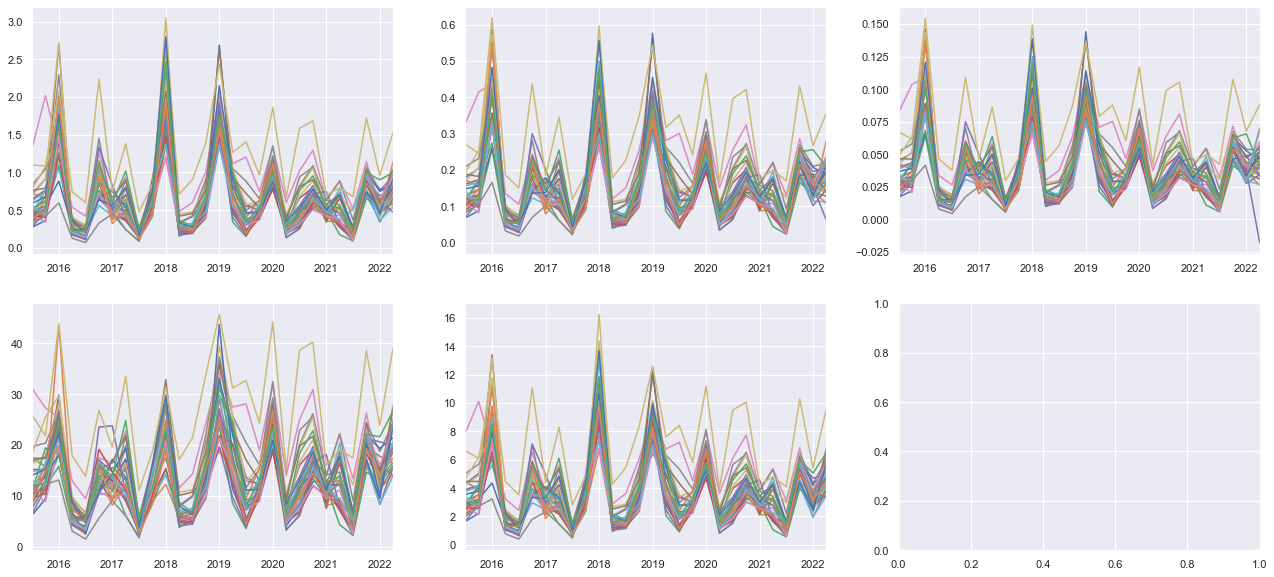

In [63]:
X = alerta_rio.set_index(dt)

fig, ax = plt.subplots(2, 3, figsize=(22, 10))
ax = ax.reshape(-1)
for station in X['id_estacao'].unique():
    station_data = X[X['id_estacao']==station]
    for i, reading in enumerate(float_cols):
        station_data[reading].resample('Q').mean().plot(ax=ax[i])
plt.show()